# Load Dependencies

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The shape of the normal dataframe is :  (4046, 188)
The shape of the abnormal dataframe is :  (10506, 188)
Normal Dataset Class: 
0.0
Abormal Dataset Class: 
1.0
The last time value is :  1488.0
Concatenated dataframe
(14552, 188)


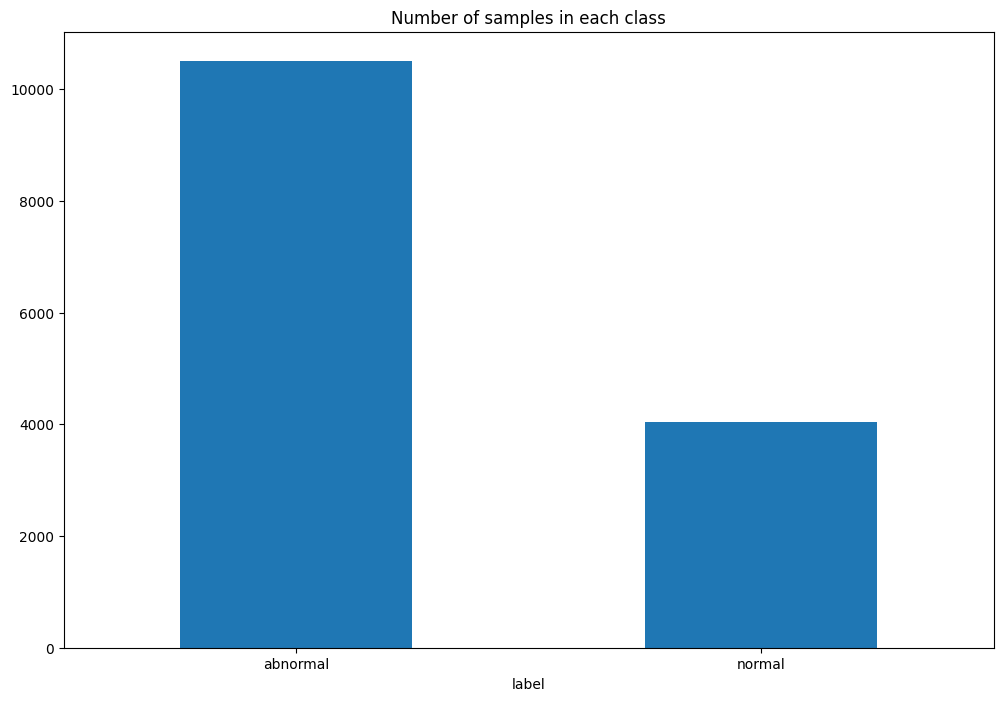

In [33]:
df_ptbd_normal = pd.read_csv("/Users/surajkumar/Desktop/LLNL/src/data/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("/Users/surajkumar/Desktop/LLNL/src/data/ptbdb_abnormal.csv", header = None)

# Number of Samples

print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)

print("Normal Dataset Class: ")
print(df_ptbd_normal.iloc[:, -1][0])

print("Abormal Dataset Class: ")
print(df_ptbd_abnormal.iloc[:, -1][0])


# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal", 
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1 
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis = 0)

print("Concatenated dataframe")
print(df_ptbd.shape)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure 
plt.figure(figsize = (12, 8))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

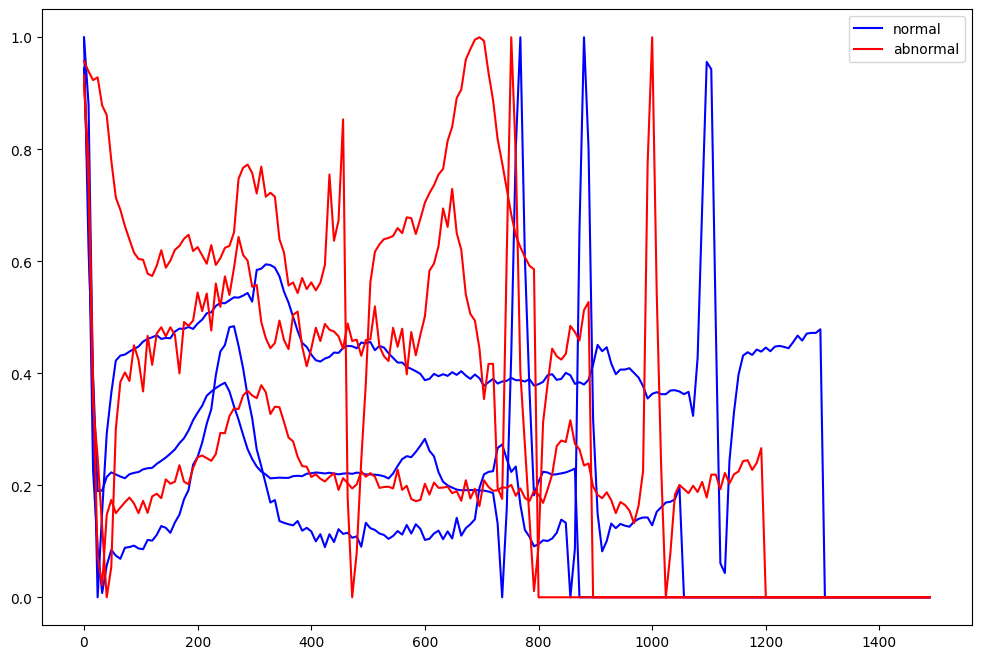

In [34]:

# select 10 random rows with class 0 (normal) and 3 with class 1 (abnormal)
df_ptbd_normal = df_ptbd[df_ptbd["label"] == 0].sample(3)
df_ptbd_abnormal = df_ptbd[df_ptbd["label"] == 1].sample(3)

plt.figure(figsize = (12, 8))
# plot the normal sequences
for i in range(df_ptbd_normal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1], color = "blue", label = "normal")
    else:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1],color = "blue")
# plot the abnormal sequences
for i in range(df_ptbd_abnormal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red", label = "abnormal")
    else:   
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red")
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
plt.show()

# Data Preparation

In [35]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


X = df_ptbd.iloc[:,:-1].to_numpy(dtype=np.float32)
y = df_ptbd.iloc[:,-1].to_numpy(dtype=np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

X_train_tensor = torch.from_numpy(X_train).view(X_train.shape[0], 1, -1)
y_train_tensor = torch.from_numpy(y_train).reshape(y_train.shape[0], 1)
# X_val_tensor = torch.from_numpy(X_val)
# y_val_tensor = torch.from_numpy(y_val)
X_test_tensor = torch.from_numpy(X_test).view(X_test.shape[0], 1, -1)
y_test_tensor = torch.from_numpy(y_test).reshape(y_test.shape[0], 1)

# Print shapes to verify
print("Train set:", X_train_tensor.shape, y_train_tensor.shape)
# print("Validation set:", X_val_tensor.shape, y_val_tensor.shape)
print("Test set:", X_test_tensor.shape, y_test_tensor.shape)


Train set: torch.Size([11641, 1, 187]) torch.Size([11641, 1])
Test set: torch.Size([2911, 1, 187]) torch.Size([2911, 1])


# Model

Batch Size Shapes: (torch.Size([80, 1, 187]), torch.Size([80, 1]))
epoch: 1/25, step: 100/146, loss = 0.3121
epoch: 2/25, step: 100/146, loss = 0.3200
epoch: 3/25, step: 100/146, loss = 0.1710
epoch: 4/25, step: 100/146, loss = 0.0721
epoch: 5/25, step: 100/146, loss = 0.1119
epoch: 6/25, step: 100/146, loss = 0.1128
epoch: 7/25, step: 100/146, loss = 0.0328
epoch: 8/25, step: 100/146, loss = 0.0600
epoch: 9/25, step: 100/146, loss = 0.0766
epoch: 10/25, step: 100/146, loss = 0.0208
epoch: 11/25, step: 100/146, loss = 0.0707
epoch: 12/25, step: 100/146, loss = 0.0169
epoch: 13/25, step: 100/146, loss = 0.0316
epoch: 14/25, step: 100/146, loss = 0.0125
epoch: 15/25, step: 100/146, loss = 0.0089
epoch: 16/25, step: 100/146, loss = 0.0122
epoch: 17/25, step: 100/146, loss = 0.0205
epoch: 18/25, step: 100/146, loss = 0.0059
epoch: 19/25, step: 100/146, loss = 0.0317
epoch: 20/25, step: 100/146, loss = 0.0462
epoch: 21/25, step: 100/146, loss = 0.0061
epoch: 22/25, step: 100/146, loss = 0.0

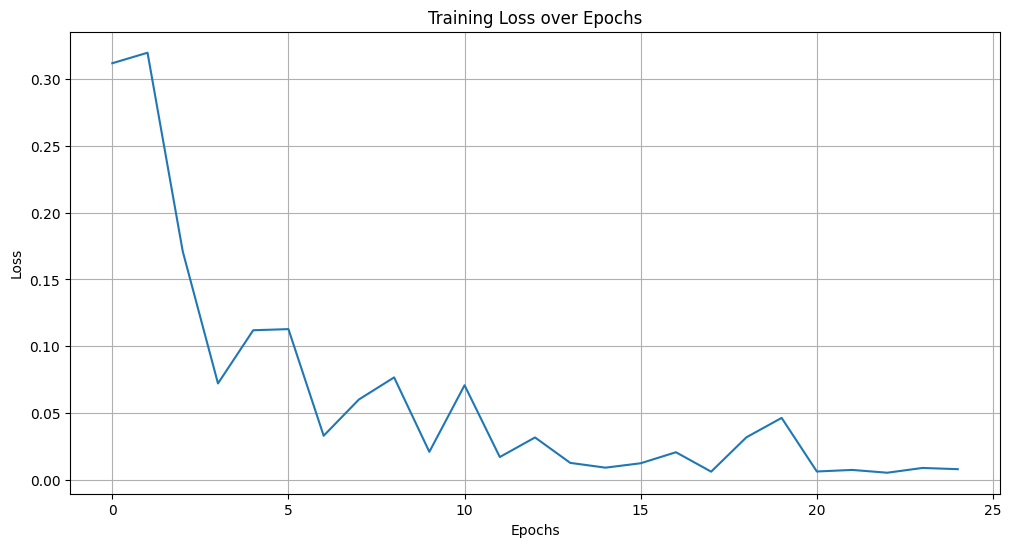

In [50]:
import torch
import torch.nn as nn 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Create Model Class
class BinaryAbnormalNormal(nn.Module):

    def __init__(self, input_size):
        super(BinaryAbnormalNormal, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Calculate the size of flattened features
        # Input size: 187
        # After conv1 and pool1: 187 -> 93
        # After conv2 and pool2: 93 -> 46
        # After conv3 and pool3: 46 -> 23
        self.fc1 = nn.Linear(128*23, 64)
        self.fc2 = nn.Linear(64, 1)
        
        # Other layers
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(self.relu(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu(self.bn3(self.conv3(x))))
        
        # Flatten the output
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return x

#Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=80, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=80, shuffle=True)

examples = iter(train_loader)
samples, label = next(examples)
print(f"Batch Size Shapes: {samples.shape, label.shape}")


model = BinaryAbnormalNormal(X_train.shape[1])

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

epochs = 25
n_total_steps = len(train_loader)
losses = []
for epoch in range(epochs):
    for i, (features, labels) in enumerate(train_loader):

        # forward
        outputs = model(features)
        base_loss = criterion(outputs, labels)
        
        # Create a mask for cases where prediction is close to 0 but true label is close to 1
        # Minimize the loss for cases where abnormal heartbeat is predicted as normal - more important to penalize for misclassifying normal heartbeats as abnormal.
        mask = (outputs.abs() < 0.1) & (labels.abs() > 0.9)
        # Double the loss for these cases
        scaled_loss = base_loss * (1 + mask.float())
        
        loss = scaled_loss.mean()

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"epoch: {epoch+1}/{epochs}, step: {i+1}/{n_total_steps}, loss = {loss.item():.4f}")
            losses.append(loss.item())

plt.figure(figsize=(12, 6))
plt.plot(losses)
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

# Calculating Accuracy

In [52]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for features, labels in test_loader:
        outputs = model(features)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 98.90072140158021%


# Confusion Matrix

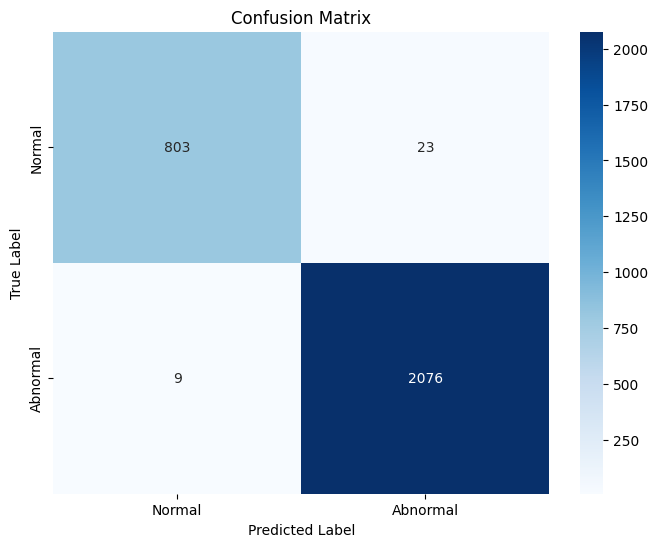

When the model predicts abnormal, it is right 98.90% of the time
When the model predicts normal, it is right 98.89% of the time


In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model(X_test_tensor)
y_pred_classes = np.round(y_pred.detach().numpy()).flatten()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create labels
class_names = ['Normal', 'Abnormal']

# Create a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = cm[1][1]/(cm[1][1]+cm[0][1]) * 100.0
recall = cm[0][0]/(cm[0][0]+cm[1][0]) * 100.0
print(f"When the model predicts abnormal, it is right {precision:.2f}% of the time")
print(f"When the model predicts normal, it is right {recall:.2f}% of the time")

